In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt("notas_andes.dat")

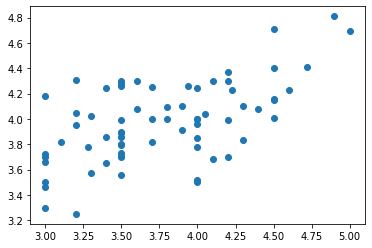

In [5]:
plt.scatter(data[:,0], data[:,4])

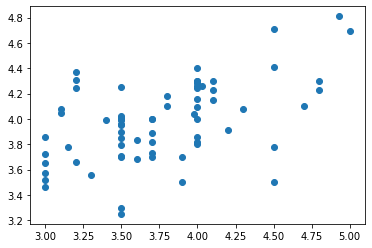

In [6]:
plt.scatter(data[:,1], data[:,4])

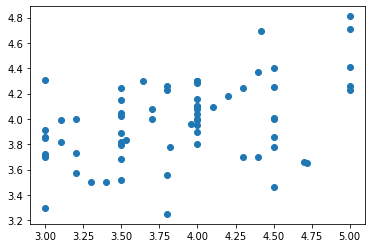

In [7]:
plt.scatter(data[:,2], data[:,4])

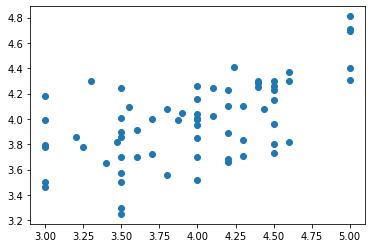

In [8]:
plt.scatter(data[:,3], data[:,4])

In [10]:
def model(x, betas):
    y = betas[0]
    for i in range(1,len(betas)):
        y += betas[i]*x[i-1]
    return y

In [19]:
def loglike(x_obs, y_obs, sigma_y_obs, betas):
    n_obs = len(y_obs)
    l = 0.0
    for i in range(n_obs):
        l += -0.5 * (y_obs[i] - model(x_obs[i,:], betas))**2/sigma_y_obs[i]**2
    return l

In [20]:
x_obs = data[:,:4]
y_obs = data[:,4]
sigma_y_obs = np.ones(len(y_obs))*0.1

n_iteraciones = 10000
betas = np.zeros([n_iteraciones,5])
for i in range(1,n_iteraciones):
    betas_now = betas[i-1,:]
    betas_next = betas_now + np.random.normal(scale=0.01, size=5)
    
    loglike_now = loglike(x_obs, y_obs, sigma_y_obs, betas_now)
    loglike_next = loglike(x_obs, y_obs, sigma_y_obs, betas_next)
    
    gamma = np.min([np.exp(loglike_next-loglike_now),1.0])
    alpha = np.random.random()
    
    if alpha < gamma:
        betas[i,:] = betas_next
    else:
        betas[i,:] = betas_now

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


(array([ 419.,  439.,  346.,  596.,  183.,  533.,  400., 1018., 3265.,
        2801.]),
 array([-0.1333565 ,  0.05365636,  0.24066922,  0.42768208,  0.61469494,
         0.8017078 ,  0.98872066,  1.17573352,  1.36274639,  1.54975925,
         1.73677211]),
 <BarContainer object of 10 artists>)

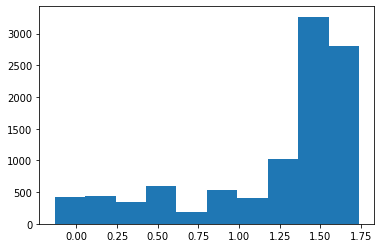

In [21]:
plt.hist(betas[:,0])

(array([  75.,  772., 2446., 4022., 1769.,  560.,  141.,   73.,   54.,
          88.]),
 array([0.        , 0.03802736, 0.07605471, 0.11408207, 0.15210942,
        0.19013678, 0.22816413, 0.26619149, 0.30421884, 0.3422462 ,
        0.38027355]),
 <BarContainer object of 10 artists>)

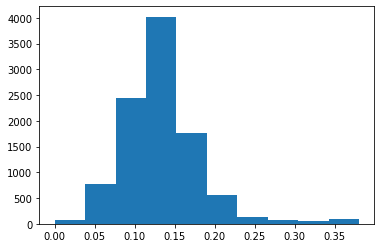

In [22]:
plt.hist(betas[:,1])

(array([  23.,   19.,   82.,  626., 2079., 3310., 2415.,  810.,  541.,
          95.]),
 array([-0.02412622,  0.00912101,  0.04236823,  0.07561545,  0.10886267,
         0.14210989,  0.17535711,  0.20860434,  0.24185156,  0.27509878,
         0.308346  ]),
 <BarContainer object of 10 artists>)

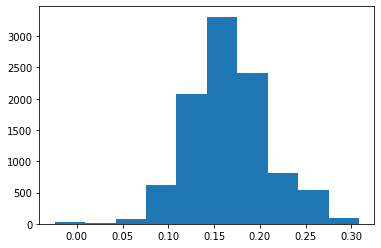

In [23]:
plt.hist(betas[:,2])

(array([  17.,   13.,  107.,  966., 2880., 2575., 1728.,  853.,  532.,
         329.]),
 array([-0.00234273,  0.02630489,  0.05495251,  0.08360013,  0.11224775,
         0.14089537,  0.16954299,  0.19819062,  0.22683824,  0.25548586,
         0.28413348]),
 <BarContainer object of 10 artists>)

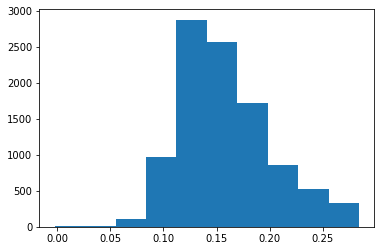

In [24]:
plt.hist(betas[:,3])

(array([   6.,   35.,    9.,   37.,  896., 3677., 2822., 1779.,  616.,
         123.]),
 array([0.        , 0.03971299, 0.07942599, 0.11913898, 0.15885197,
        0.19856496, 0.23827796, 0.27799095, 0.31770394, 0.35741694,
        0.39712993]),
 <BarContainer object of 10 artists>)

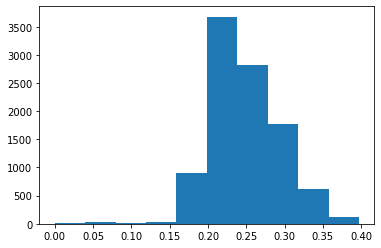

In [25]:
plt.hist(betas[:,4])

In [29]:
for i in range(5):
    print('beta {}: {:.2f}+/-{:.2f}'.format(i, np.mean(betas[:,i]), np.std(betas[:,i])))

beta 0: 1.22+/-0.51
beta 1: 0.13+/-0.05
beta 2: 0.17+/-0.04
beta 3: 0.16+/-0.04
beta 4: 0.25+/-0.04
